<a href="https://colab.research.google.com/github/ShinUkhang/AI/blob/main/%EC%99%80%EC%9D%B8%EB%93%B1%EA%B8%89%ED%8C%90%EC%A0%95%ED%95%98%EA%B8%B0_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

와인의 성분을 통해서 와인의 등급을 판단해보겠습니다.

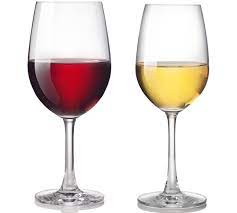

와인을 분류할 데이터를 불러옵니다.

**(# 표시는 주석으로 컴퓨터가 코드로 생각하지 않습니다.)**

In [31]:
#구글 코랩의 files라는 모듈을 불러옵니다. 
from google.colab import files 
uploaded=files.upload()

Saving winequality.csv to winequality (1).csv


판다스(표,테이블을 다루는 파이썬)으로 파일을 불러옵니다.

파일이름을 정확하게 입력해야 오류가 없습니다. 

In [32]:
import pandas as pd
data=pd.read_csv('winequality.csv') #파일을 못 읽으면 encoding='cp949'을 추가해서 실행하세요. 
data=pd.DataFrame(data) 

데이터를 살펴봅시다.

target(0: 레드와인, 1: 화이트와인)

나머지 성분은 화학, 생명과학 책과 인터넷검색을 통해서 자세히 알아봅시다.

(fixed acidity :주석산농도, volatile acidity:아세트산농도, citric acid:구연산농도, residual sugar:잔류당분농도, chlorides: 염화나트륨농도, free sulfur dioxide:유리아황산농도, total sulfur dioxide:총아황산농도, density:밀도, pH:pH농도 , sulphates:황산칼륨농도, alcohol:알콜도수, alcohol:와인등급(1~10) 


In [33]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


평균, 표준편차, 최솟값,최댓값, 사분위수를 확인합니다.

In [34]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


데이터의 형태와 갯수를 확인합니다.
(float64는 실수라는 뜻입니다.)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  target                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


데이터를 히스토그램으로 시각화했습니다.

확률과통계 시간에 배운 정규분포곡선을 나타내는 자료는 무엇인지 확인해봅시다. **(히스토그램이 나타내는 넓이는 모두 1 입니다.)**

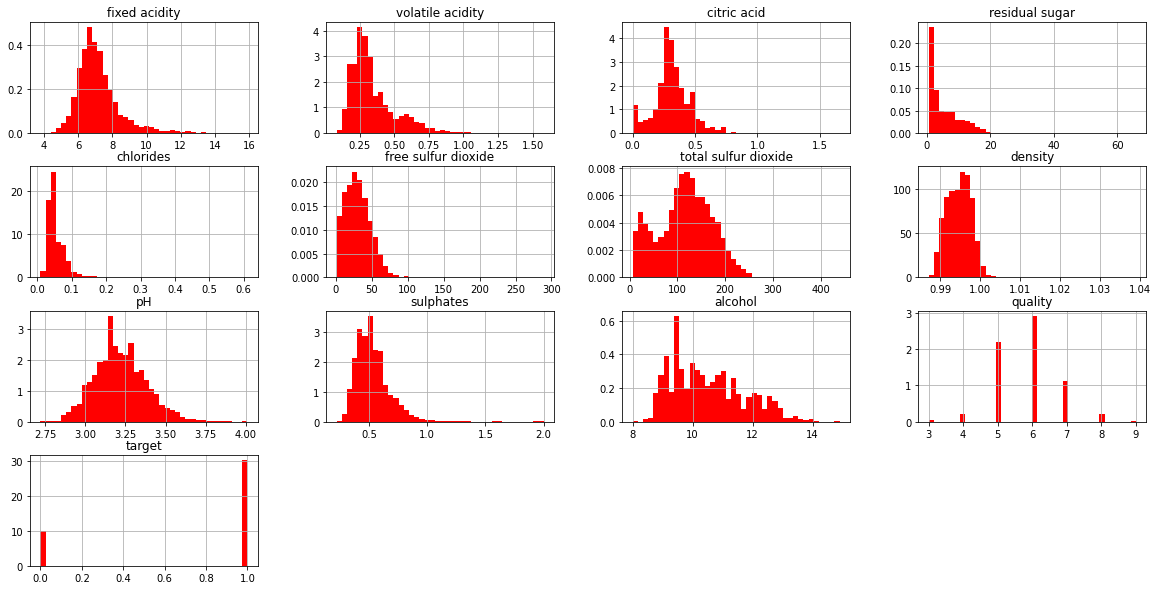

In [36]:
#맷플롯립은 데이터를 시각화하여 표와 그래로 보여주는 모듈입니다.
#hist는 히스토그램을 의미하여 bins는 계급의 갯수, density는 상대도수, figsize는 크기, color는 색상입니다.
import matplotlib.pyplot as plt  
data.hist(bins=40, density=True, color='red',figsize=(20,10)) 
plt.show()

데이터 간의 상관계수를 확인합니다.

(결정계수도 있지만 최대한 코드를 간단하게 하고자 합니다.)

In [37]:
corr_matrix=data.corr()# 상관계수를 확인합니다. 
corr_matrix['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
target                  0.119323
Name: quality, dtype: float64

상관계수가 높은 성분을 2개 선택해보았습니다.

 'total sulfur dioxide','volatile acidity'를 x,y축으로 두고 색상은 와인분류(target)으로 두고 표현했습니다.

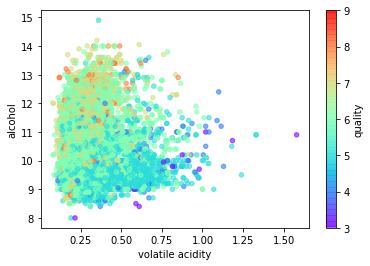

In [38]:
#cmap은 수치에 맞게 색상을 구분하여 표현한 것입니다. 검색을 해보시면 rainbow외에 다양한 것이 있습니다. 
#alpha는 투명도인데 산점도가 겹쳐도 보이도록 합니다.
#sharex는 그래프 테두리를 사라지게 해서 예쁘게 보입니다. 필수적인 요소는 아닙니다. 
data.plot(kind='scatter', x='volatile acidity',y='alcohol',c='quality' ,cmap='rainbow', alpha=0.6, sharex=False) #scatter는 산점도, c는 색상대상, cmap은 색tkd, alpha는 투명도, sharex는 테두리 없애기
plt.show()

데이터의 결측치를 제거합니다. 

결측치는 빈칸입니다. 빈칸을 처리하는 방법은 0, 평균, 앞의수, 뒤의수 등 다양하게 채우는 방법이 있지만 , 여기서는 빈칸이 있는 행은 모두 삭제하겠습니다.

In [39]:
data=data.dropna()

7개의 데이터를 선택해보았습니다.

In [40]:
x=data[['target','alcohol','fixed acidity','volatile acidity','chlorides','chlorides','total sulfur dioxide','sulphates','free sulfur dioxide']]
y=data['quality']

데이터를 분할해보겠습니다.

전체데이터를 훈련데이터와 테스트데이터 2개로 나눕니다. 

In [41]:
from sklearn.model_selection import train_test_split #데이터를 나누는 sklearn모듈을 불러옵니다. 
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

데이터의 행태를 확인합니다.

위에서 선택한 7개의 성분을 묶어서 벡터(1차원 텐서)가 됩니다.

이러한 벡터가 4547개를 모아서 모델을 훈련합니다.

나머지 벡터 1950개는 나중에 모델을 테스트하는 것에 쓰입니다.

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4547, 9)
(4547,)
(1950, 9)
(1950,)


데이터를 확률과통계시간에 배운 표준화해보겠습니다. 

$$y={{x-m}\over{\sigma}}$$

표준화 전 후의 정확도는 차이가 있는 것을 확인할 수 있습니다. 

In [43]:
#각 성분별로 평균을 구해줍니다. 
mean=x_train.mean(axis=0)
std=x_train.std(axis=0)

In [44]:
print(mean)
print(std)

target                    0.753244
alcohol                  10.501278
fixed acidity             7.221190
volatile acidity          0.340598
chlorides                 0.056068
chlorides                 0.056068
total sulfur dioxide    115.317902
sulphates                 0.533613
free sulfur dioxide      30.421707
dtype: float64
target                   0.431171
alcohol                  1.195221
fixed acidity            1.303680
volatile acidity         0.166428
chlorides                0.034652
chlorides                0.034652
total sulfur dioxide    56.168329
sulphates                0.151784
free sulfur dioxide     17.452693
dtype: float64


데이터를 모두 표준화시켜줍니다.

In [45]:
x_train-=mean
x_train/=std
x_test-=mean
x_test/=std

인공신경망 모델을 만들고자 합니다. 

In [90]:
from tensorflow import keras #인공신경망을 다루는 파이썬 모듈
from tensorflow.keras.models import Sequential #인공신경망 시작한다는 뜻
from tensorflow.keras.layers import Dense # 인공신경망의 층을 넣는다는 뜻

model = Sequential()
model.add(Dense(20, input_dim=9,activation='relu')) # 성분이 9개이므로 노드 9개짜리 은닉층 추가, relu는 활성화 함수
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='softmax')) #출력층, 와인등급은 10개 이므로 10입력
opt=keras.optimizers.Adam(learning_rate=0.01) #확률적 경사하강법대신 Adam을 이용, 학습률 확인
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

모델을 실행합니다. 
epoch는 반복횟수이고, batch_size는 훈련데이터 단위입니다.

예를 들면 100개의 데이터에서 epoch=5, batch_size=10이면
100개를 10개씩 묶어주고 묶음마다 1개만 훈련합니다.
이러한 방법으로 5회 반복합니다.

그리고 시간을 확인하면서 배치사이즈와 에포크에 따라 비교합시다. 

In [91]:
import time
a=time.time()
hist = model.fit(x_train, y_train, shuffle=True, epochs=10, batch_size=10)
b=time.time()
print(b-a)

Epoch 1/10
455/455 [==============================] - 2s 3ms/step - loss: 1.1954 - acc: 0.4953
Epoch 2/10
455/455 [==============================] - 1s 2ms/step - loss: 1.1064 - acc: 0.5256
Epoch 3/10
455/455 [==============================] - 1s 2ms/step - loss: 1.0875 - acc: 0.5333
Epoch 4/10
455/455 [==============================] - 1s 3ms/step - loss: 1.0751 - acc: 0.5419
Epoch 5/10
455/455 [==============================] - 1s 2ms/step - loss: 1.0671 - acc: 0.5472
Epoch 6/10
455/455 [==============================] - 1s 2ms/step - loss: 1.0615 - acc: 0.5496
Epoch 7/10
455/455 [==============================] - 1s 2ms/step - loss: 1.0562 - acc: 0.5492
Epoch 8/10
455/455 [==============================] - 1s 2ms/step - loss: 1.0541 - acc: 0.5538
Epoch 9/10
455/455 [==============================] - 1s 2ms/step - loss: 1.0525 - acc: 0.5474
Epoch 10/10
455/455 [==============================] - 1s 3ms/step - loss: 1.0459 - acc: 0.5558
11.71688175201416


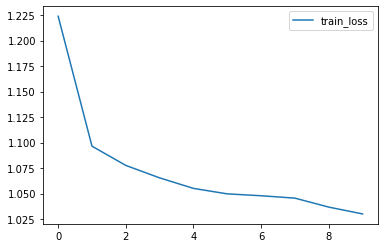

In [79]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train_loss')
plt.legend()
plt.show()

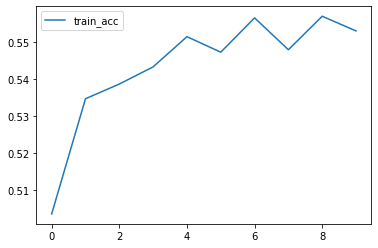

In [80]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'],  label='train_acc')
plt.legend()
plt.show()

In [81]:
y_pred=model.predict(x_test)
y_pred[1]

61/61 [==============================] - 0s 2ms/step


array([2.6550733e-06, 8.3083000e-07, 1.3296190e-06, 1.1582929e-03,
       4.7176373e-03, 9.4363071e-02, 5.0918329e-01, 3.2106268e-01,
       6.7300335e-02, 2.2097176e-03], dtype=float32)

In [92]:
import numpy as np
y_pred=np.argmax(model.predict(x_test), axis=-1)
print(y_pred)
print(y_test)

61/61 [==============================] - 0s 2ms/step
[7 6 6 ... 6 5 6]
3103    7
1419    7
4761    6
4690    6
4032    5
       ..
4294    5
3757    5
5954    7
4418    6
6182    5
Name: quality, Length: 1950, dtype: int64


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  4,  41, 410, 210,  16,   0],
       [  2,  22, 222, 495, 178,  24],
       [  0,   0,   8, 157, 131,  30],
       [  0,   0,   0,   0,   0,   0]])

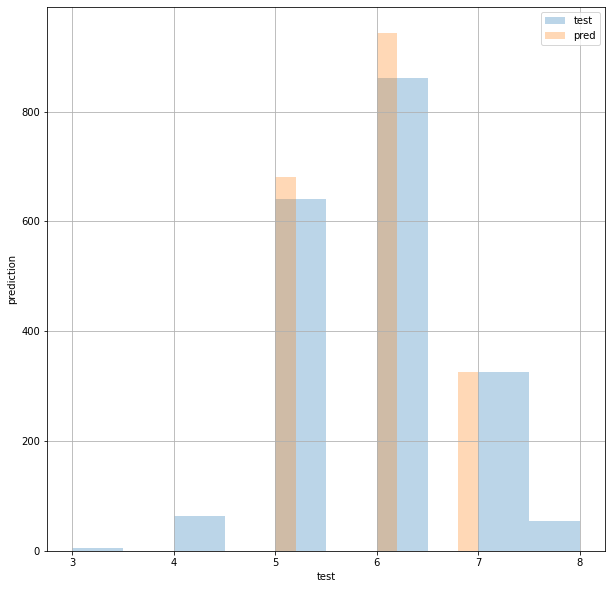

In [95]:
plt.figure(figsize=(10,10))
plt.hist(y_test, alpha=0.3,label='test')
plt.hist(y_pred, alpha=0.3,label='pred')
plt.xlabel('test')
plt.ylabel('prediction')
plt.grid()
plt.legend()
plt.show()